# Analisis de datos - Grupo 7 - Trabajo práctico - parte 1
**Inteligencia Artificial - CEIA - FIUBA - 2025 B2**

## Autores

- **Mendoza Dante**.
- **Vasquez Jorge**.

## Información del trabajo

**Dataset seleccionado:** Crímenes reportados en Chicago.<br>
**Año:** 2022.<br>
**Link:** https://data.cityofchicago.org/Public-Safety/Crimes-2022/9hwr-2zxp/about_data

## 🔍 Exploración y comprensión de los datos

- **Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.**.
- **Describir las características principales del dataset, incluyendo el número de observaciones, número de variables y tipos de datos.**
- **Identificar patrones generales, distribuciones y cualquier anomalía inicial en los datos.**
- **Visualizar las variables más importantes para entender sus relaciones y distribuciones.**

In [2]:
# Importamos las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el estilo de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargamos el archivo CSV
archivo = "Datos/Crimenes_chicago_2022.csv"
df = pd.read_csv(archivo)

# Mostramos las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

# Mostramos información sobre las filas y columnas del dataset
print(f"\nInformación sobre las filas y columnas:")
print(f"\nNúmero de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

# Mostramos información general del dataset
print("\nInformación general del dataset:")
df.info()

# Mostromos datos estadísticos descriptivos básicos
print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

# Convertimos algunas columnas a un tipo de dato correcto, como las fechas y variables categóricas.
print("\nConvertimos algunas columnas a un tipo de dato correcto, como las fechas y variables categóricas:")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Convertimos columnas a category
categorical_cols = [
    'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
    'Location Description', 'FBI Code'
]
df[categorical_cols] = df[categorical_cols].astype('category')

# Convertimos location a string
df['Location'] = df['Location'].astype('string')

# Verificamos los cambios
print("\nTipos de datos actualizados:")
df.dtypes

# Creamos nuevas columnas a partir de la fecha del crimen
print("\nCreamos nuevas columnas a partir de la fecha del crimen:")
df['anio'] = df['Date'].dt.year
df['mes'] = df['Date'].dt.month
df['dia'] = df['Date'].dt.day
df['hora'] = df['Date'].dt.hour
df['dia_semana'] = df['Date'].dt.day_name()  # ejemplo: 'Monday'
df['periodo'] = df['Date'].dt.strftime('%Y%m').astype(int)

# Verificomos los cambios
df[['Date', 'anio', 'mes', 'dia', 'hora', 'dia_semana', 'periodo']].head()


Primeras filas del dataset:


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13024128,JG202134,12/31/2022 11:55:00 PM,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,False,...,29.0,25,15,1139642.0,1898786.0,2022,11/15/2023 03:41:31 PM,41.878374,-87.762732,POINT (-87.762731975 41.878373984)
1,12938426,JG100085,12/31/2022 11:50:00 PM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29.0,25,08B,1139357.0,1900199.0,2022,01/07/2023 03:41:08 PM,41.882257,-87.763744,POINT (-87.763744015 41.882256634)
2,12938337,JG100016,12/31/2022 11:50:00 PM,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,...,49.0,1,07,1165385.0,1946614.0,2022,01/07/2023 03:41:08 PM,42.009108,-87.666844,POINT (-87.666843608 42.009107852)
3,12938351,JG100087,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,21.0,73,08A,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203)
4,12938340,JG100005,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,...,21.0,73,15,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203)



Información sobre las filas y columnas:

Número de filas: 239783
Número de columnas: 22

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239783 entries, 0 to 239782
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239783 non-null  int64  
 1   Case Number           239783 non-null  object 
 2   Date                  239783 non-null  object 
 3   Block                 239783 non-null  object 
 4   IUCR                  239783 non-null  object 
 5   Primary Type          239783 non-null  object 
 6   Description           239783 non-null  object 
 7   Location Description  238789 non-null  object 
 8   Arrest                239783 non-null  bool   
 9   Domestic              239783 non-null  bool   
 10  Beat                  239783 non-null  int64  
 11  District              239783 non-null  int64  
 12  Ward                  239773 non-

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,2.397830e+05,239783,239783,239783,239783,239783,239783,238789,239783,239783,...,239773.000000,239783.000000,239783,2.348840e+05,2.348840e+05,239783.0,239783,234884.000000,234884.000000,234884
unique,NaN,239736,112314,27977,307,31,287,135,2,2,...,NaN,NaN,26,NaN,NaN,NaN,1740,NaN,NaN,118344
top,NaN,JF445443,01/01/2022 12:00:00 AM,001XX N STATE ST,0810,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,01/03/2023 03:40:27 PM,NaN,NaN,POINT (-87.905227221 41.976290414)
freq,NaN,3,155,604,20113,54896,27229,67654,211617,194824,...,NaN,NaN,54896,NaN,NaN,NaN,226980,NaN,NaN,315
mean,1.273231e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.383792,36.268668,NaN,1.165381e+06,1.887039e+06,2022.0,NaN,41.845614,-87.668600,NaN
std,7.094977e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.209128,21.553409,NaN,1.679406e+04,3.229529e+04,0.0,NaN,0.088832,0.061011,NaN
min,2.654300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,2022.0,NaN,36.619446,-91.686566,NaN
25%,1.267811e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,22.000000,NaN,1.153948e+06,1.859284e+06,2022.0,NaN,41.769168,-87.710155,NaN
50%,1.276908e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.000000,32.000000,NaN,1.167255e+06,1.893383e+06,2022.0,NaN,41.863073,-87.661467,NaN
75%,1.285730e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.000000,53.000000,NaN,1.176856e+06,1.910066e+06,2022.0,NaN,41.909023,-87.626402,NaN



Convertimos algunas columnas a un tipo de dato correcto, como las fechas y variables categóricas:

Tipos de datos actualizados:

Creamos nuevas columnas a partir de la fecha del crimen:


,Date,anio,mes,dia,hora,dia_semana,periodo
0,2022-12-31 23:55:00,2022,12,31,23,Saturday,202212
1,2022-12-31 23:50:00,2022,12,31,23,Saturday,202212
2,2022-12-31 23:50:00,2022,12,31,23,Saturday,202212
3,2022-12-31 23:47:00,2022,12,31,23,Saturday,202212
4,2022-12-31 23:47:00,2022,12,31,23,Saturday,202212


## 📊 Aplicación de técnicas de visualización

- **Utilizar técnicas de visualización adecuadas para ilustrar las principales características del dataset.**
- **Asegurarse de que las visualizaciones sean claras, concisas y efectivas para comunicar la información.**
- **Interpretar los resultados obtenidos a partir de las visualizaciones.**

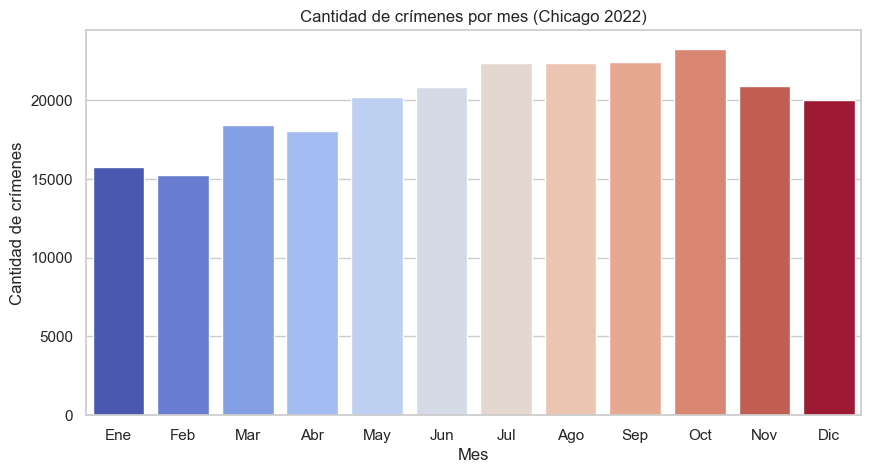

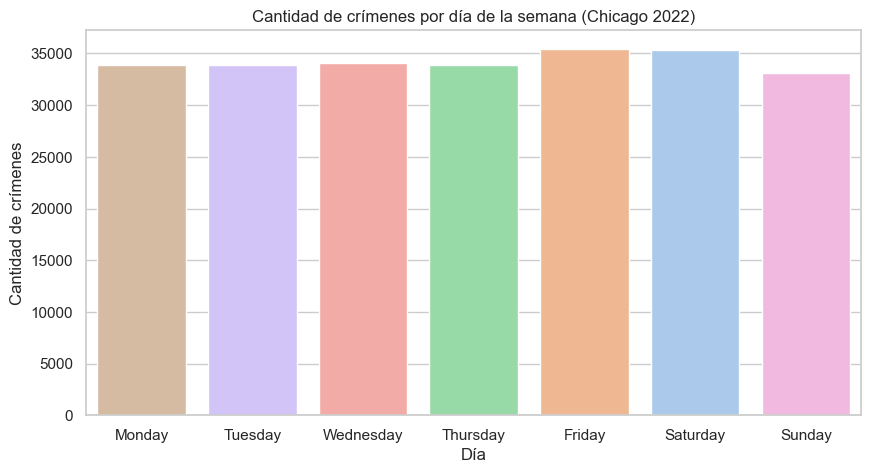

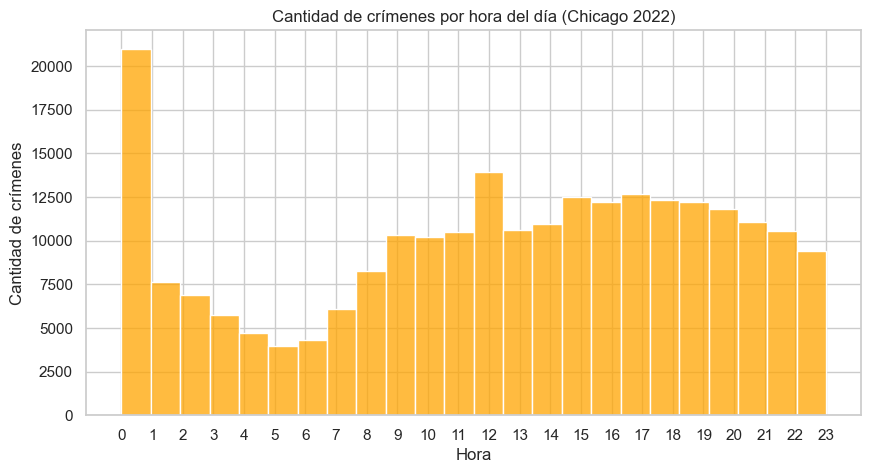

C:\Users\dmendoza\AppData\Local\Temp\ipykernel_26456\1489271659.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top, y='Primary Type', order=top_crimes, palette='viridis')


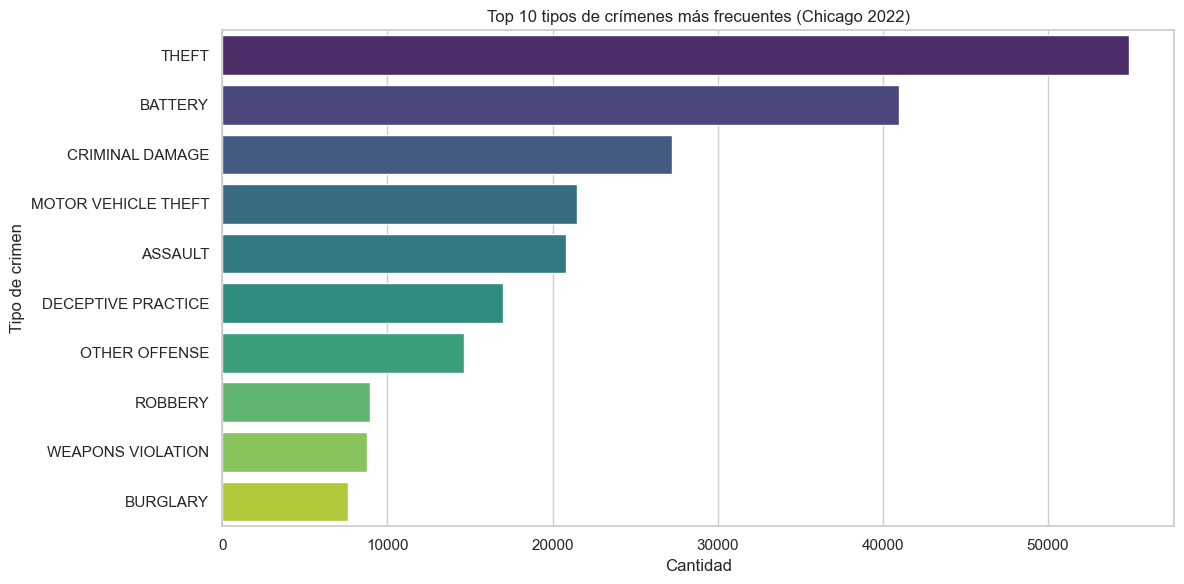

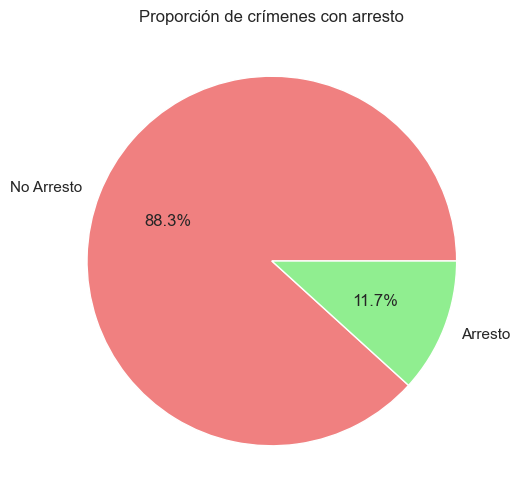

In [5]:
# Cantidad de crímenes por mes
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='mes', hue='mes', palette='coolwarm', legend=False)
plt.title('Cantidad de crímenes por mes (Chicago 2022)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de crímenes')
plt.xticks(ticks=range(0,12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Cantidad de crímenes por día de la semana
plt.figure(figsize=(10, 5))
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='dia_semana', hue='dia_semana', order=orden_dias, palette='pastel', legend=False)
plt.title('Cantidad de crímenes por día de la semana (Chicago 2022)')
plt.xlabel('Día')
plt.ylabel('Cantidad de crímenes')
plt.show()

# Cantidad de crímenes por hora del día
plt.figure(figsize=(10, 5))
sns.histplot(df['hora'], bins=24, kde=False, color='orange')
plt.title('Cantidad de crímenes por hora del día (Chicago 2022)')
plt.xlabel('Hora')
plt.ylabel('Cantidad de crímenes')
plt.xticks(range(0, 24))
plt.show()

# Tipos de crímenes más comunes
# Calcular las 10 categorías más frecuentes
top_crimes = df['Primary Type'].value_counts().nlargest(10).index

# Filtramos el DataFrame para incluir solo las 10 categorías más frecuentes
df_top = df[df['Primary Type'].isin(top_crimes)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, y='Primary Type', order=top_crimes, palette='viridis')
plt.title('Top 10 tipos de crímenes más frecuentes (Chicago 2022)')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de crimen')
plt.tight_layout()
plt.show()

# Porcentaje de crímenes con arresto
plt.figure(figsize=(6, 6))
arrest_counts = df['Arrest'].value_counts(normalize=True)
plt.pie(arrest_counts, labels=['No Arresto', 'Arresto'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proporción de crímenes con arresto')
plt.show()


## 🧪 Limpieza del dataset

- **Identificar y tratar los valores faltantes en el dataset.**
- **Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.**
- **Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.**


Valores nulos por columna:


ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     994
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4899
Y Coordinate            4899
Year                       0
Updated On                 0
Latitude                4899
Longitude               4899
Location                4899
anio                       0
mes                        0
dia                        0
hora                       0
dia_semana                 0
periodo                    0
dtype: int64

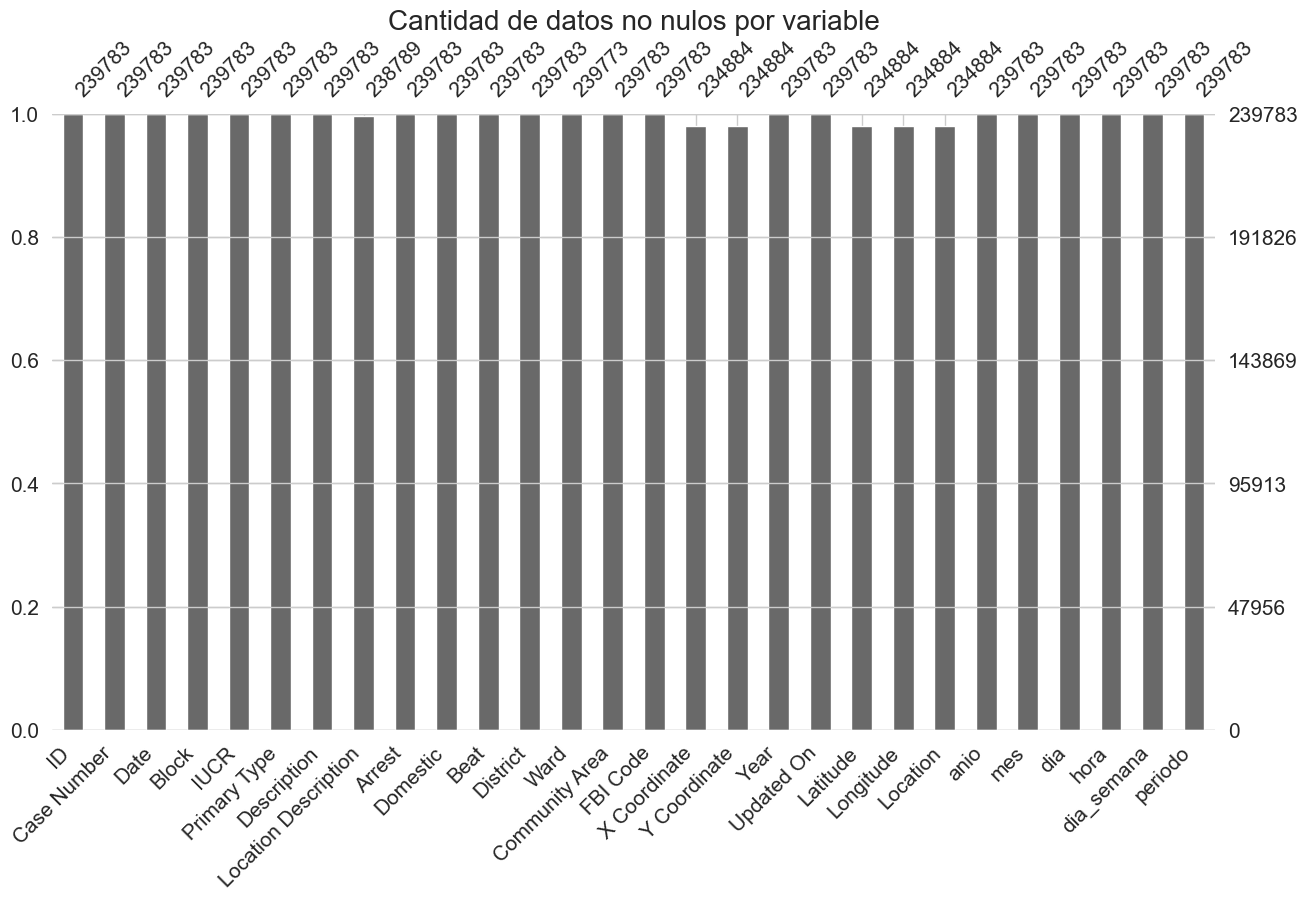

Porcentaje de valores nulos por columna:


X Coordinate            2.04
Location                2.04
Longitude               2.04
Latitude                2.04
Y Coordinate            2.04
Location Description    0.41
Ward                    0.00
ID                      0.00
dia_semana              0.00
hora                    0.00
dia                     0.00
mes                     0.00
anio                    0.00
Updated On              0.00
Year                    0.00
FBI Code                0.00
Case Number             0.00
Community Area          0.00
District                0.00
Beat                    0.00
Domestic                0.00
Arrest                  0.00
Description             0.00
Primary Type            0.00
IUCR                    0.00
Block                   0.00
Date                    0.00
periodo                 0.00
dtype: float64

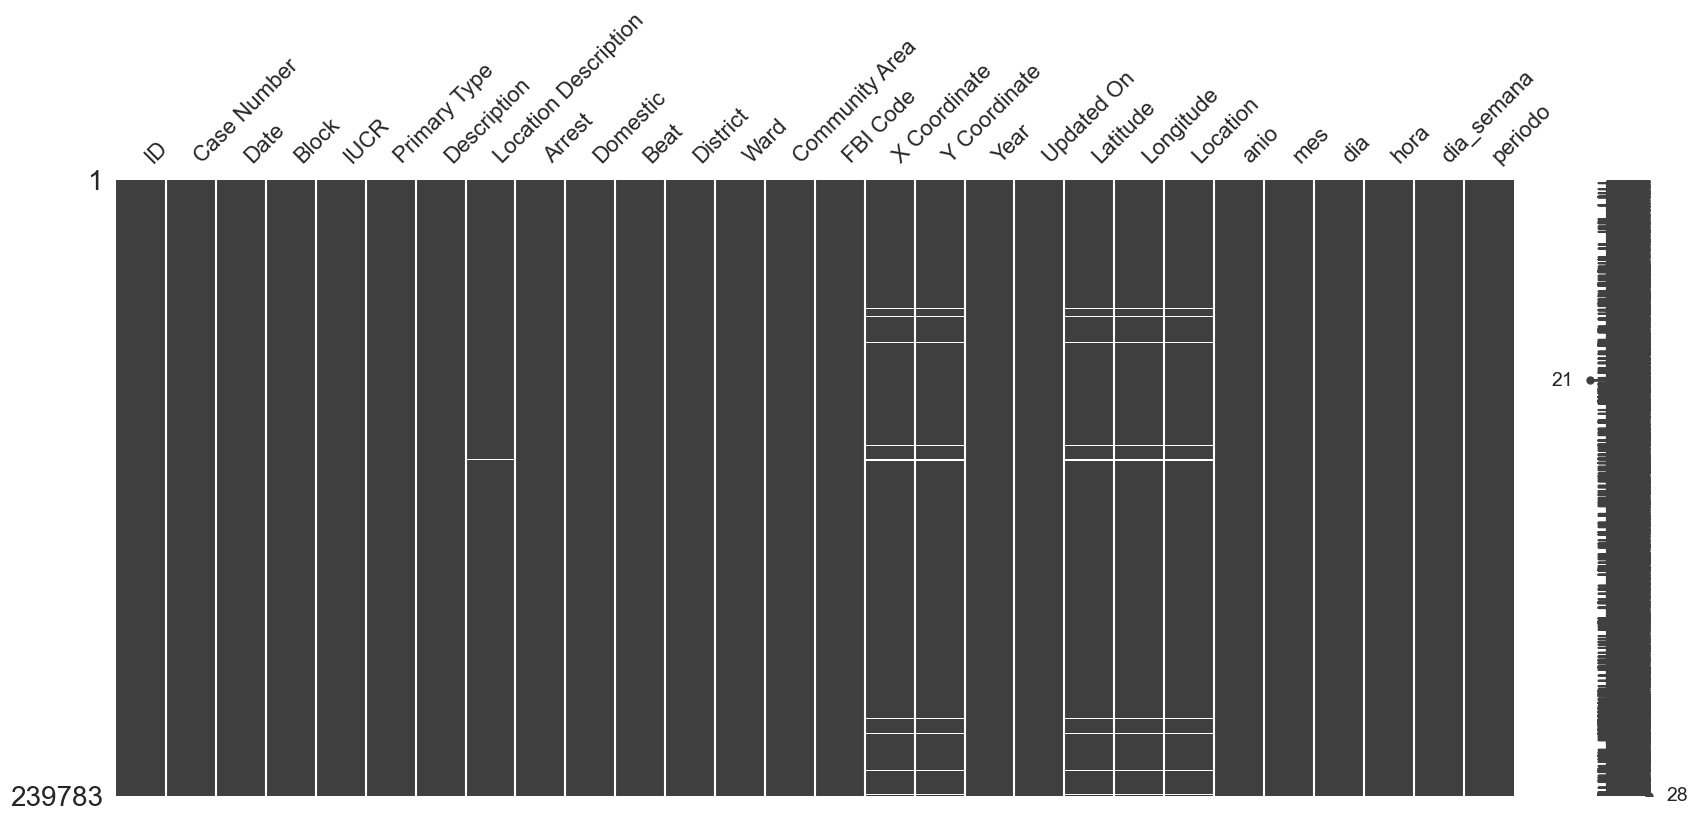

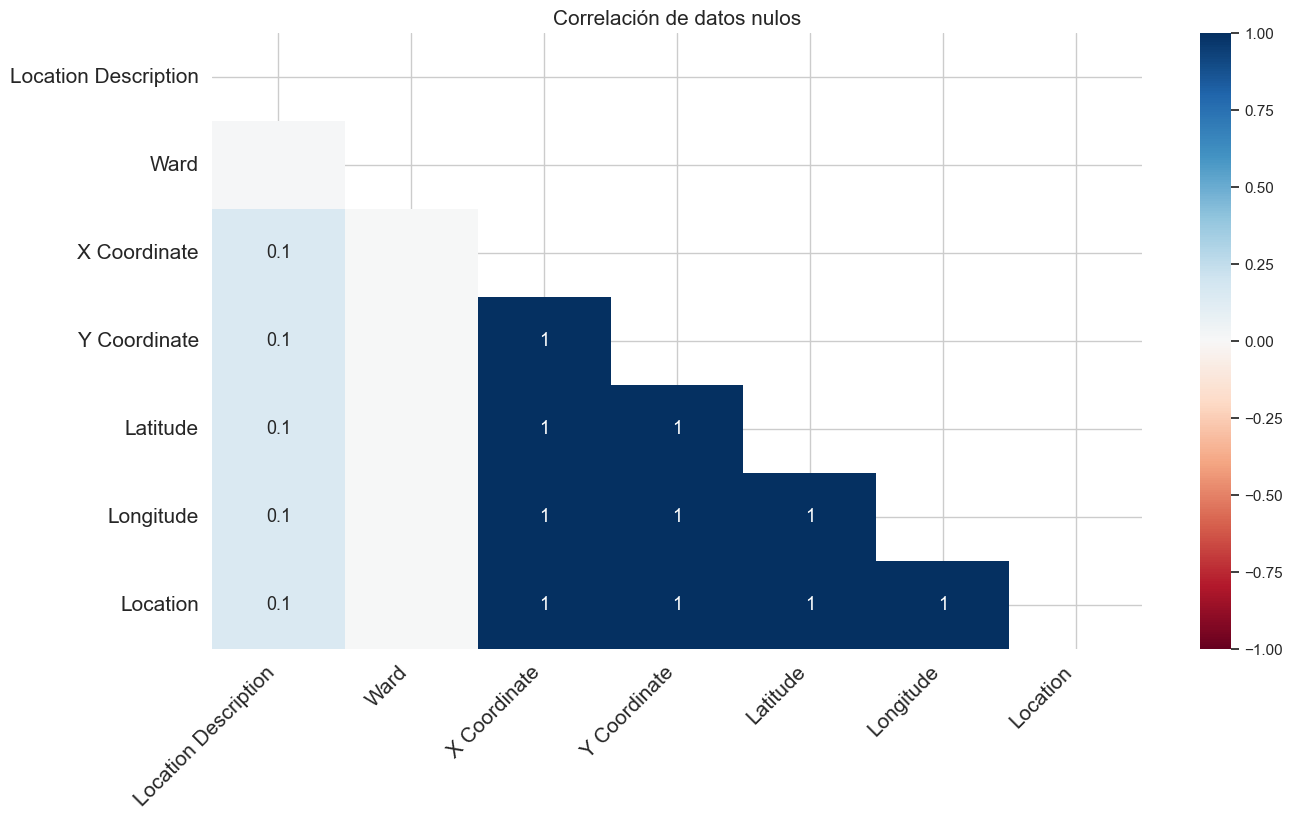

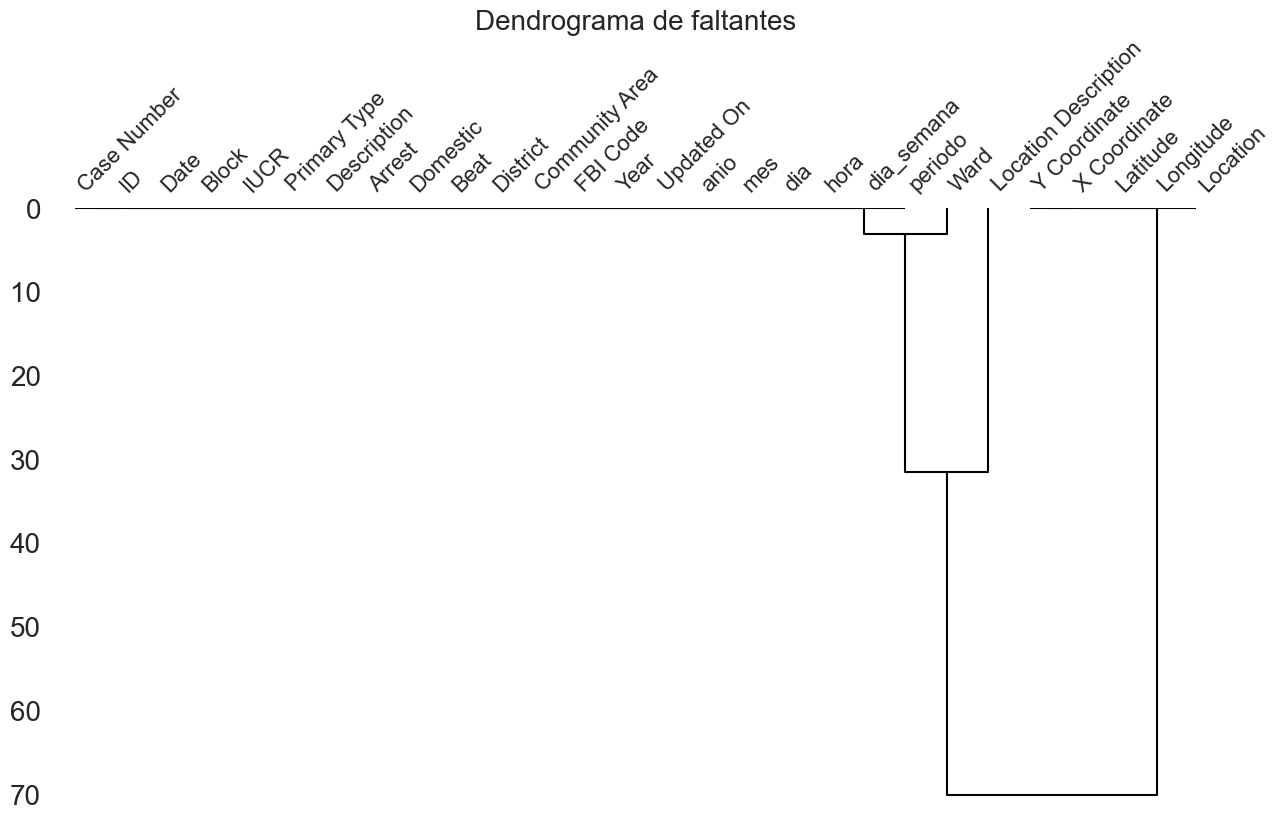

In [7]:
import missingno as msno

# Comprobamos la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
display(df.isna().sum())

# Visualización con biblioteca Missingno
msno.bar(df, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

# Matriz de valores faltantes
msno.matrix(df, figsize=(20,8))

# Porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
display(df.isna().mean().sort_values(ascending=False).round(4) * 100)

# otras visualizaciones
msno.heatmap(df, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

msno.dendrogram(df, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

#### Analisis de la causa de los datos faltantes:

Se identifico que el tipo de causa de los datos faltantes es MAR, porque la falta de valores en las columnas Location, Longitude, Latitude, Y Coordinate, e X Coordinate, se relacionan entre si.

Entonces, ¿Por qué faltan datos?

Al examinar el conjunto de datos, se pudo observar que los valores faltantes se relacionan con la ubicación geográfica de la escena del crimen. Esto no es sorprendente, ya que el conjunto de datos de delitos de Chicago se basa en testimonios de primera mano de personas involucradas en el crimen o en sus alrededores. No es necesario que estos informes de primera mano contengan la ubicación específica del crimen.
Ademas en la pagina web se aclara lo siguiente con respecto a los datos:
"Estos delitos pueden basarse en información preliminar proporcionada al departamento de policía por los denunciantes, que no ha sido verificada. Las clasificaciones preliminares de los delitos pueden modificarse posteriormente en función de investigaciones adicionales y siempre existe la posibilidad de errores mecánicos o humanos."
"Para proteger la privacidad de las víctimas de delitos, las direcciones se muestran solo a nivel de manzana y no se identifican ubicaciones específicas."

Por lo tanto, estos valores faltantes se pueden explicar perfectamente.

Debido a que los valores faltantes no son valores numéricos, no podemos completar los datos faltantes. Por lo tanto, eliminaremos estos valores del conjunto de datos.

In [8]:
df.isna().sum()[df.isna().sum() > 0] # columnas con datos faltantes

Location Description     994
Ward                      10
X Coordinate            4899
Y Coordinate            4899
Latitude                4899
Longitude               4899
Location                4899
dtype: int64

In [9]:
new_df = df.dropna() # Eliminamos las fila con valores faltantes
new_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,anio,mes,dia,hora,dia_semana,periodo
0,13024128,JG202134,2022-12-31 23:55:00,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,False,...,2023-11-15 15:41:31,41.878374,-87.762732,POINT (-87.762731975 41.878373984),2022,12,31,23,Saturday,202212
1,12938426,JG100085,2022-12-31 23:50:00,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2023-01-07 15:41:08,41.882257,-87.763744,POINT (-87.763744015 41.882256634),2022,12,31,23,Saturday,202212
2,12938337,JG100016,2022-12-31 23:50:00,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,...,2023-01-07 15:41:08,42.009108,-87.666844,POINT (-87.666843608 42.009107852),2022,12,31,23,Saturday,202212
3,12938351,JG100087,2022-12-31 23:47:00,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,2023-01-07 15:41:08,41.727812,-87.660399,POINT (-87.660399127 41.72781203),2022,12,31,23,Saturday,202212
4,12938340,JG100005,2022-12-31 23:47:00,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,...,2023-01-07 15:41:08,41.727812,-87.660399,POINT (-87.660399127 41.72781203),2022,12,31,23,Saturday,202212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239773,12658444,JF193049,2022-01-01 00:00:00,011XX N WESTERN AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,SCHOOL - PUBLIC BUILDING,False,False,...,2023-01-03 15:40:27,41.902438,-87.687012,POINT (-87.687011559 41.902437713),2022,1,1,0,Saturday,202201
239776,12581817,JF100052,2022-01-01 00:00:00,080XX S CRANDON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,2023-01-03 15:40:27,41.749261,-87.568629,POINT (-87.568629323 41.749260995),2022,1,1,0,Saturday,202201
239778,12843026,JF413724,2022-01-01 00:00:00,073XX S LAFAYETTE AVE,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,RESIDENCE,False,False,...,2023-01-03 15:40:27,41.761133,-87.626473,POINT (-87.626473315 41.761132791),2022,1,1,0,Saturday,202201
239779,12736123,JF287295,2022-01-01 00:00:00,033XX N HAMLIN AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,2023-01-03 15:40:27,41.941879,-87.722374,POINT (-87.722373658 41.941879259),2022,1,1,0,Saturday,202201


In [10]:
print(round(234231 / 239783 * 100,2), "porcentaje de datos que se han conservado.")

97.68 porcentaje de datos que se han conservado.


### Conclusion

Se eliminaron las filas que tenian datos faltantes para generar un nuevo conjunto (new_df) de datos limpios.

### Manejo de outliers

In [11]:
# Seleccionar variables numéricas relevantes
outliers_ubicacion_geografica = new_df[['Latitude', 'Longitude']].dropna() # ubicacion geografica de los incidentes
outliers_coordenadas = new_df[['X Coordinate', 'Y Coordinate']].dropna() #coordenadas de referencia de chicago 
outliers_areas = new_df[['Ward', 'Community Area']].dropna() # distritos y areas comunitarias
outliers_zonas = new_df[['Beat', 'District']].dropna() # zona de incidentes y distritos

Outliers
Latitude: <41.56 o >42.12
Longitude: <-87.84 o >-87.50


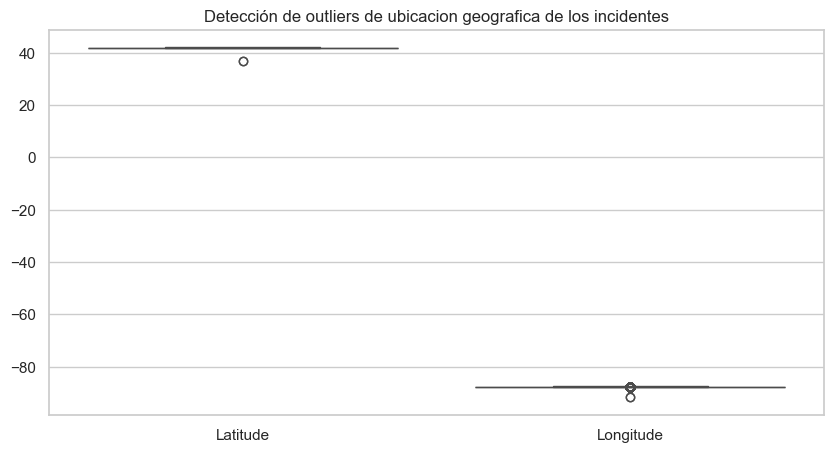

In [12]:
# Métodos estadísticos para detectar outliers
Q1 = outliers_ubicacion_geografica.quantile(0.25)
Q3 = outliers_ubicacion_geografica.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (outliers_ubicacion_geografica < (Q1 - 1.5 * IQR)) | (outliers_ubicacion_geografica > (Q3 + 1.5 * IQR))
print(f"Outliers\nLatitude: <{Q1['Latitude'] - 1.5 * IQR['Latitude']:.02f} o >{Q3['Latitude'] + 1.5 * IQR['Latitude']:.02f}")
print(f"Longitude: <{Q1['Longitude'] - 1.5 * IQR['Longitude']:.02f} o >{Q3['Longitude'] + 1.5 * IQR['Longitude']:.02f}")

# Visualización de outliers con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_ubicacion_geografica)
plt.title("Detección de outliers de ubicacion geografica de los incidentes")
plt.show()

Outliers
X Coordinate: <1119551.50 o >1211247.50
Y Coordinate: <1783170.50 o >1986118.50


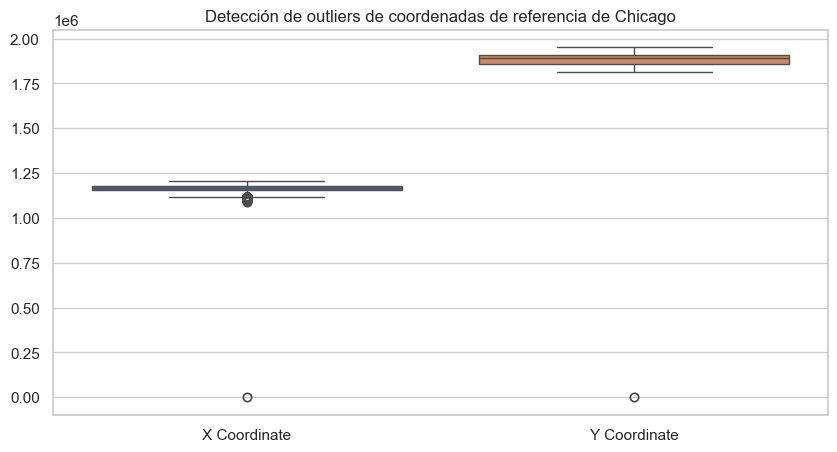

In [13]:
# Métodos estadísticos para detectar outliers
Q1 = outliers_coordenadas.quantile(0.25)
Q3 = outliers_coordenadas.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (outliers_coordenadas < (Q1 - 1.5 * IQR)) | (outliers_coordenadas > (Q3 + 1.5 * IQR))
print(f"Outliers\nX Coordinate: <{Q1['X Coordinate'] - 1.5 * IQR['X Coordinate']:.02f} o >{Q3['X Coordinate'] + 1.5 * IQR['X Coordinate']:.02f}")
print(f"Y Coordinate: <{Q1['Y Coordinate'] - 1.5 * IQR['Y Coordinate']:.02f} o >{Q3['Y Coordinate'] + 1.5 * IQR['Y Coordinate']:.02f}")

# Visualización de outliers con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_coordenadas)
plt.title("Detección de outliers de coordenadas de referencia de Chicago")
plt.show()

Outliers
Ward: <-30.00 o >74.00
Community Area: <-24.50 o >99.50


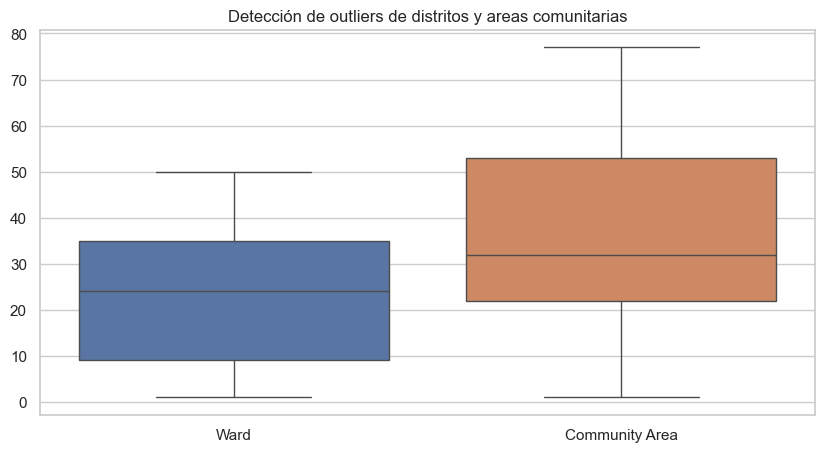

In [14]:
# Métodos estadísticos para detectar outliers
Q1 = outliers_areas.quantile(0.25)
Q3 = outliers_areas.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (outliers_areas < (Q1 - 1.5 * IQR)) | (outliers_areas > (Q3 + 1.5 * IQR))
print(f"Outliers\nWard: <{Q1['Ward'] - 1.5 * IQR['Ward']:.02f} o >{Q3['Ward'] + 1.5 * IQR['Ward']:.02f}")
print(f"Community Area: <{Q1['Community Area'] - 1.5 * IQR['Community Area']:.02f} o >{Q3['Community Area'] + 1.5 * IQR['Community Area']:.02f}")

# Visualización de outliers con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_areas)
plt.title("Detección de outliers de distritos y areas comunitarias")
plt.show()

Outliers
Beat: <-1253.50 o >3510.50
District: <-13.00 o >35.00


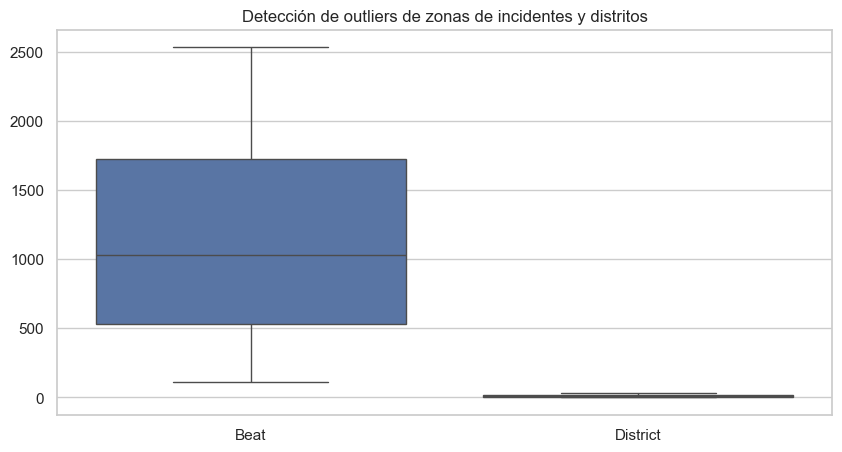

In [15]:
# Métodos estadísticos para detectar outliers
Q1 = outliers_zonas.quantile(0.25)
Q3 = outliers_zonas.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (outliers_zonas < (Q1 - 1.5 * IQR)) | (outliers_zonas > (Q3 + 1.5 * IQR))
print(f"Outliers\nBeat: <{Q1['Beat'] - 1.5 * IQR['Beat']:.02f} o >{Q3['Beat'] + 1.5 * IQR['Beat']:.02f}")
print(f"District: <{Q1['District'] - 1.5 * IQR['District']:.02f} o >{Q3['District'] + 1.5 * IQR['District']:.02f}")

# Visualización de outliers con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_zonas)
plt.title("Detección de outliers de zonas de incidentes y distritos")
plt.show()

### Conclusion:

Al haber utilizado metodos estadisticos para detectar outliers, no se encontro ningun dato atipico significativo en el dataset.

## 💡 Planteo de al menos tres preguntas a ser respondidas mediante análisis de datos

- **¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?**.
- **¿Se observan anomalías y/o patrones estacionales?**.
- **¿Hay diferencias significativas entre el número de crímenes en distintos distritos o comunas?**.
- **¿Están las fuerzas policiales bien distribuidas en relación a las características de cada zona? (ej: la mayor cantidad de actividad policial/arrestos se registra en las zonas críticas)**.
- **¿Cómo variaron los crímenes en la ciudad después de algún cambio o evento social importante? (ej: Covid-19, protestas, etc.)**.

¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?
- En el mes de octubre se registra la mayor cantidad de crimenes.
- El dia viernes se registra la mayor cantidad de crimenes.
- A la 1 AM se registra la mayor cantidad de crimenes.

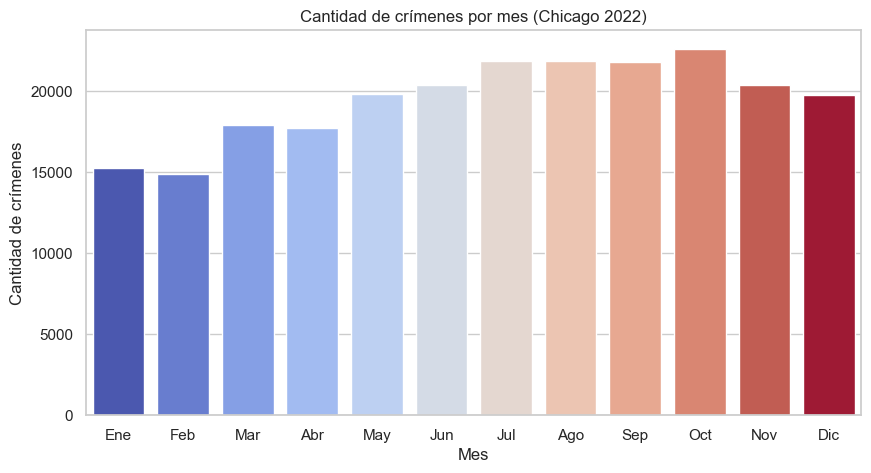

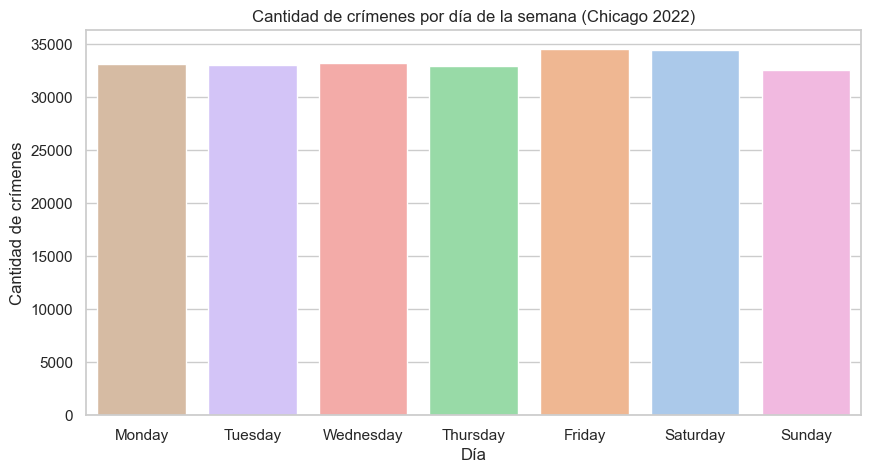

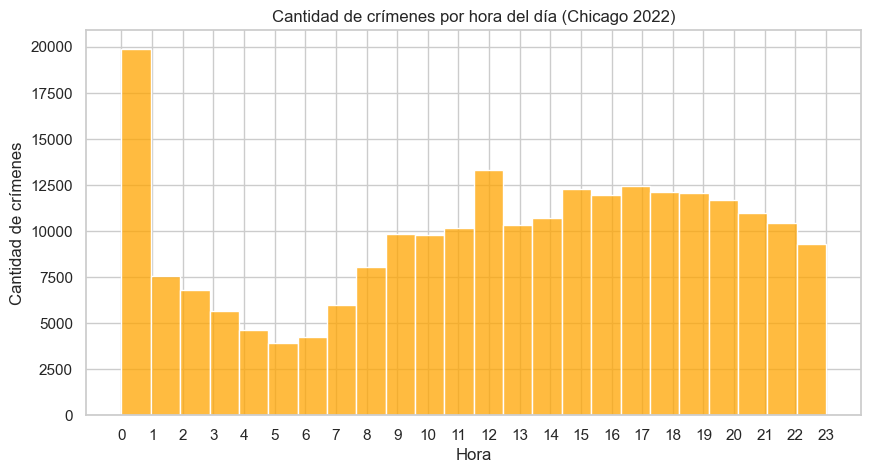

In [16]:
# Cantidad de crímenes por mes
plt.figure(figsize=(10, 5))
sns.countplot(data=new_df, x='mes', hue='mes', palette='coolwarm', legend=False)
plt.title('Cantidad de crímenes por mes (Chicago 2022)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de crímenes')
plt.xticks(ticks=range(0,12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Cantidad de crímenes por día de la semana
plt.figure(figsize=(10, 5))
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=new_df, x='dia_semana', hue='dia_semana', order=orden_dias, palette='pastel', legend=False)
plt.title('Cantidad de crímenes por día de la semana (Chicago 2022)')
plt.xlabel('Día')
plt.ylabel('Cantidad de crímenes')
plt.show()

# Cantidad de crímenes por hora del día
plt.figure(figsize=(10, 5))
sns.histplot(new_df['hora'], bins=24, kde=False, color='orange')
plt.title('Cantidad de crímenes por hora del día (Chicago 2022)')
plt.xlabel('Hora')
plt.ylabel('Cantidad de crímenes')
plt.xticks(range(0, 24))
plt.show()

¿Hay diferencias significativas entre el número de crímenes en distintos distritos o comunas?.
- En el caso de los distritos de Chicago, si existen diferencias significactivas, por ejemplo: los distritos 6, 8 y 12 tienen un registro superior de crimenes a comparacion de los demas distritos.
- En el caso de areas comunitarias, tambien existen diferencias significativas, por ejemplo: en las areas 25, 8 y 43 se registran la mayor cantidad de crimenes, a comparacion de los demas areas comunitarias.

C:\Users\dmendoza\AppData\Local\Temp\ipykernel_26456\3974838105.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette='viridis')


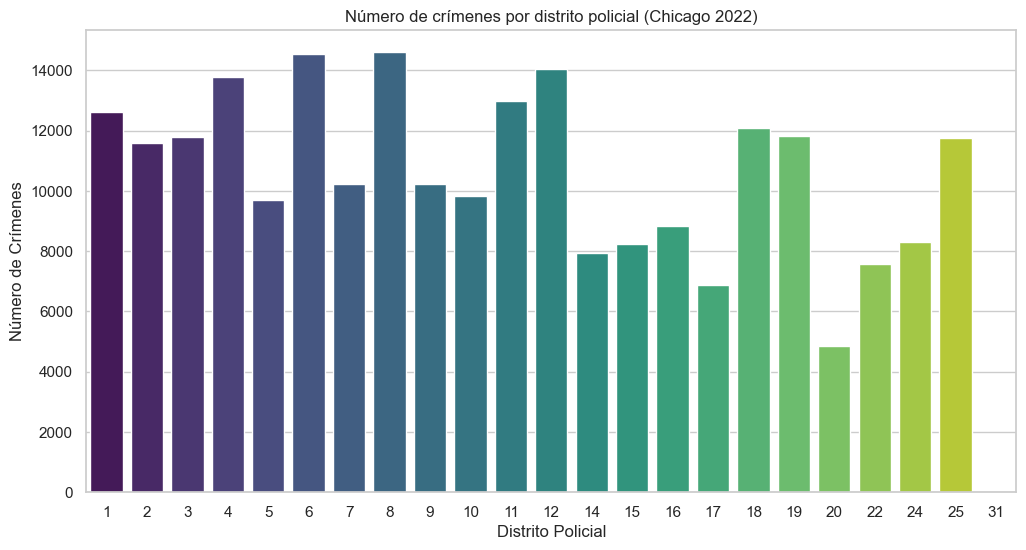

C:\Users\dmendoza\AppData\Local\Temp\ipykernel_26456\3974838105.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimenes_por_comunidad.index, y=crimenes_por_comunidad.values, palette='magma')


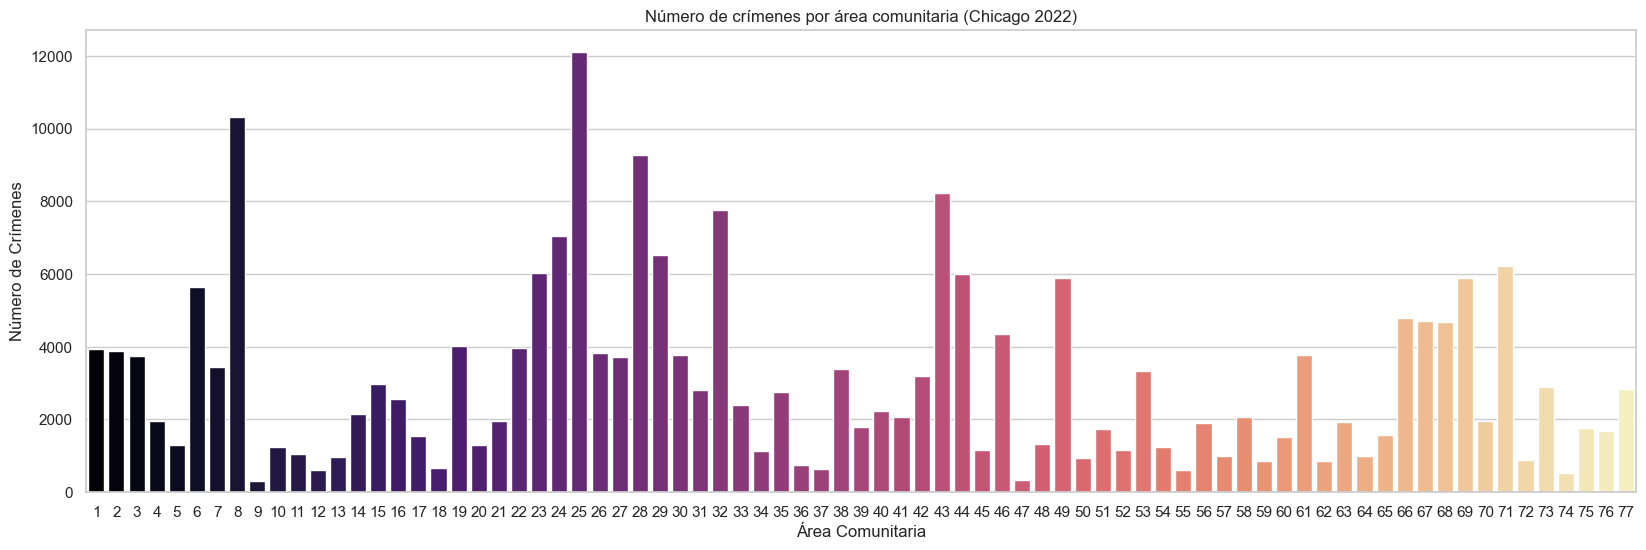

In [20]:
# Contar crímenes por distrito
crimenes_por_distrito = new_df['District'].value_counts().sort_index()

# Contar crímenes por área comunitaria
crimenes_por_comunidad = new_df['Community Area'].value_counts().sort_index()

# Visualizar crímenes por distrito
plt.figure(figsize=(12, 6))
sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette='viridis')
plt.title('Número de crímenes por distrito policial (Chicago 2022)')
plt.xlabel('Distrito Policial')
plt.ylabel('Número de Crímenes')
plt.show()

# Visualizar crímenes por área comunitaria
plt.figure(figsize=(20, 6))
sns.barplot(x=crimenes_por_comunidad.index, y=crimenes_por_comunidad.values, palette='magma')
plt.title('Número de crímenes por área comunitaria (Chicago 2022)')
plt.xlabel('Área Comunitaria')
plt.ylabel('Número de Crímenes')
plt.show()

- ¿Las fuerzas policiales están mejor distribuidas en las zonas con mayor cantidad de delitos? ¿hay más arrestos donde hay más crímenes?

Para responder estas preguntas, se procedió a  calcular el coeficiente de correlación de Pearson. Esto lo hicimos para ver si hay una correlación entre cantidad de crímenes y cantidad de arrestos por distrito. En este caso el valor obtenido es de 0,722, lo cual el coeficiente de Pearson está cerca de 1, significa que en los distritos con más crímenes también hay más arrestos, lo que podria indicar que la policía está actuando en zonas donde hay más delito.

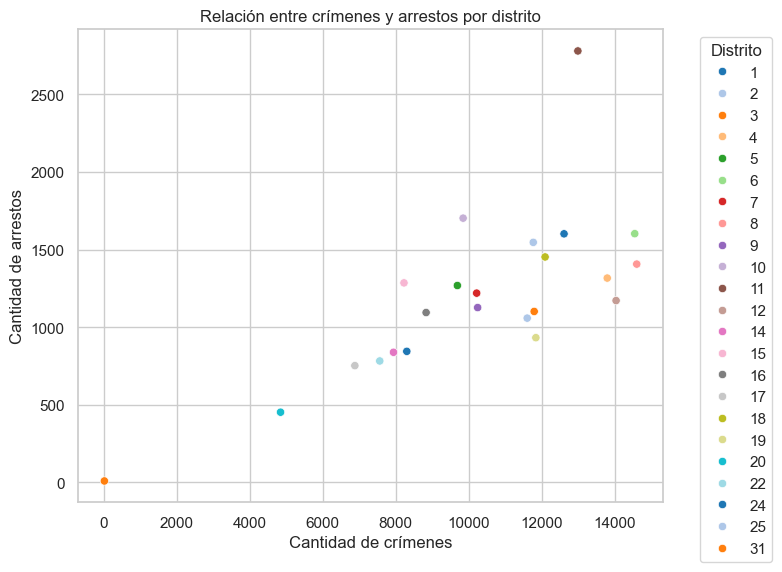

Coeficiente de correlación de Pearson: 0.722
Valor p: 0.0001
La correlación es estadísticamente significativa.


In [21]:
from scipy.stats import pearsonr
# Filtramos solo filas con distritos válidos
df_districts = new_df.dropna(subset=['District'])

# Convertimos a entero los valores de los distritos.
df_districts['District'] = df_districts['District'].astype(int)

# Total de crímenes por distrito
crimenes_por_distrito = df_districts.groupby('District').size()

# Total de arrestos por distrito
arrestos_por_distrito = df_districts[df_districts['Arrest'] == True].groupby('District').size()

# Creamos el dataframe combinado
df_arrestos = pd.DataFrame({
    'Total_Crimenes': crimenes_por_distrito,
    'Total_Arrestos': arrestos_por_distrito
})

df_arrestos.fillna(0, inplace=True)  # por si algún distrito no tuvo arrestos

# Scatterplot entre crímenes y arrestos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_arrestos, x='Total_Crimenes', y='Total_Arrestos', hue=df_arrestos.index, palette='tab20')
plt.title('Relación entre crímenes y arrestos por distrito')
plt.xlabel('Cantidad de crímenes')
plt.ylabel('Cantidad de arrestos')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calcular correlación de Pearson
correlacion, p_valor = pearsonr(df_arrestos['Total_Crimenes'], df_arrestos['Total_Arrestos'])

print(f"Coeficiente de correlación de Pearson: {correlacion:.3f}")
print(f"Valor p: {p_valor:.4f}")

# Interpretación del resultado.
if p_valor < 0.05:
    print("La correlación es estadísticamente significativa.")
else:
    print("La correlación NO es estadísticamente significativa.")